In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_style("dark")

In [8]:
data = pd.read_csv('HousingData.csv')

In [9]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data, columns=feature_names)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


Detailed NA Value Analysis Report
1. Overall Situation:
   - Total NA count: 120
   - Total data cells: 7084
   - NA ratio: 1.69%

2. NA Count by Column:
   - CRIM: 20 NA values (3.95%)
   - ZN: 20 NA values (3.95%)
   - INDUS: 20 NA values (3.95%)
   - CHAS: 20 NA values (3.95%)
   - AGE: 20 NA values (3.95%)
   - LSTAT: 20 NA values (3.95%)

3. NA Count by Row:
   - Rows with NA values: 112
   - Distribution of NA counts per row:
1    104
2      8
Name: count, dtype: int64

4. Missing Value Pattern Analysis:
   Missing values detected. Analyzing missing pattern...


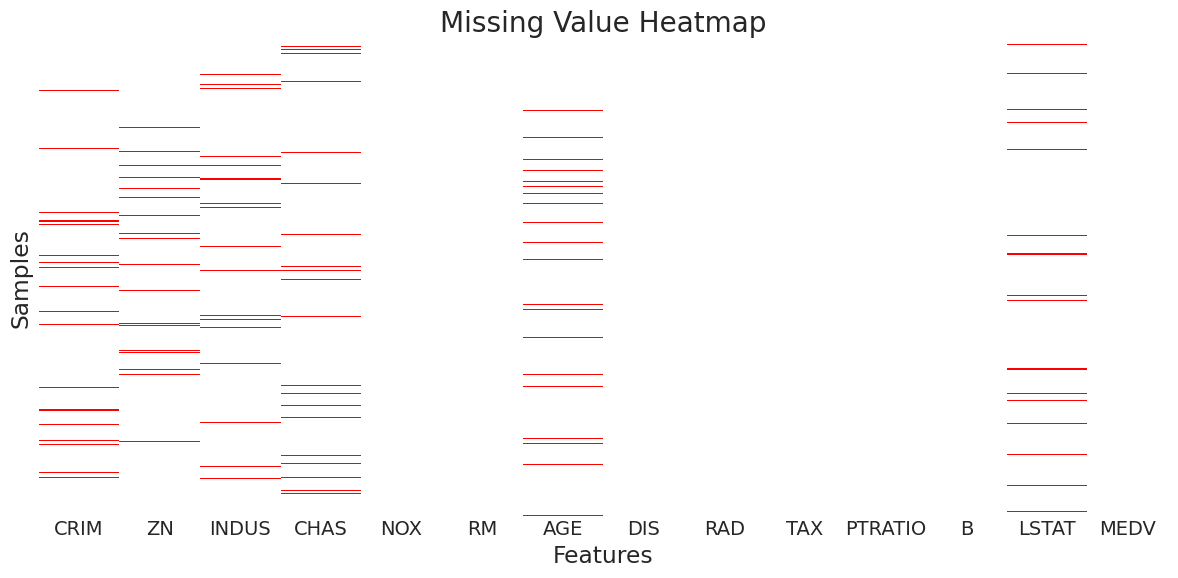

   Mean PRICE in samples with missing values: 23.14
   Mean PRICE in samples without missing values: 22.36
   t-test p-value: 0.4354
   ✓ Missing values may be random


In [10]:
def check_na_comprehensive(df):
    """
    Comprehensive function to check for NA values.
    """
    print("=" * 60)
    print("Detailed NA Value Analysis Report")
    print("=" * 60)
    
    # 1. Overall missing value situation
    total_na = df.isna().sum().sum()
    total_cells = df.size
    na_percentage = (total_na / total_cells) * 100
    
    print("1. Overall Situation:")
    print(f"   - Total NA count: {total_na}")
    print(f"   - Total data cells: {total_cells}")
    print(f"   - NA ratio: {na_percentage:.2f}%")
    
    # 2. NA count by column
    print("\n2. NA Count by Column:")
    na_by_column = df.isna().sum()
    na_columns = na_by_column[na_by_column > 0]
    
    if len(na_columns) == 0:
        print("   ✓ No columns have NA values")
    else:
        for col, na_count in na_columns.items():
            na_percent = (na_count / len(df)) * 100
            print(f"   - {col}: {na_count} NA values ({na_percent:.2f}%)")
    
    # 3. NA count by row
    print("\n3. NA Count by Row:")
    na_by_row = df.isna().sum(axis=1)
    rows_with_na = na_by_row[na_by_row > 0]
    
    print(f"   - Rows with NA values: {len(rows_with_na)}")
    if len(rows_with_na) > 0:
        print("   - Distribution of NA counts per row:")
        print(rows_with_na.value_counts().sort_index())
    
    # 4. Missing value pattern analysis
    print("\n4. Missing Value Pattern Analysis:")
    
    # Create missing value pattern matrix
    missing_matrix = df.isna()
    missing_pattern = missing_matrix.any(axis=1)
    
    if missing_pattern.any():
        # Check if missing patterns are random
        print("   Missing values detected. Analyzing missing pattern...")
        
        # Visualize missing pattern
        plt.figure(figsize=(12, 6))
        sns.heatmap(missing_matrix, cbar=False,
                    cmap=['white', 'red'],
                    yticklabels=False)
        plt.title('Missing Value Heatmap')
        plt.xlabel('Features')
        plt.ylabel('Samples')
        plt.tight_layout()
        plt.show()
        
        # Check if missing values relate to the target variable
        if 'MEDV' in df.columns:
            has_na = df.isna().any(axis=1)
            df_na = df[has_na]
            df_no_na = df[~has_na]
            
            print(f"   Mean PRICE in samples with missing values: {df_na['MEDV'].mean():.2f}")
            print(f"   Mean PRICE in samples without missing values: {df_no_na['MEDV'].mean():.2f}")
            
            # t-test for significant difference
            t_stat, p_value = stats.ttest_ind(
                df_na['MEDV'].dropna(), 
                df_no_na['MEDV'], 
                equal_var=False
            )
            print(f"   t-test p-value: {p_value:.4f}")
            if p_value < 0.05:
                print("   ⚠️  Missing values are likely not completely at random!")
            else:
                print("   ✓ Missing values may be random")
    else:
        print("   ✓ No missing values")
    
    return na_by_column, rows_with_na

# Perform NA value checking
na_by_column, rows_with_na = check_na_comprehensive(df)

In [11]:
# Fill NA values with median (English comments and strings)
print("=" * 60)
print("Filling NA values with median value")
print("=" * 60)

# Create a copy to avoid modifying original data
df_filled = df.copy()

# Show NA situation before filling
print("\nNA count before filling:")
na_before = df_filled.isna().sum()
print(na_before[na_before > 0])

# Fill NA in each column with the column median
for col in df_filled.columns:
    if df_filled[col].isna().sum() > 0:
        median_value = df_filled[col].median()
        na_count = df_filled[col].isna().sum()
        df_filled[col].fillna(median_value, inplace=True)
        print(f"\nColumn '{col}': {na_count} NA values filled with median {median_value:.4f}")

# Check NA content after filling
print("\n" + "=" * 60)
print("NA check after filling")
print("=" * 60)
na_by_column_after, rows_with_na_after = check_na_comprehensive(df_filled)


Filling NA values with median value

NA count before filling:
CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64

Column 'CRIM': 20 NA values filled with median 0.2537

Column 'ZN': 20 NA values filled with median 0.0000

Column 'INDUS': 20 NA values filled with median 9.6900

Column 'CHAS': 20 NA values filled with median 0.0000

Column 'AGE': 20 NA values filled with median 76.8000

Column 'LSTAT': 20 NA values filled with median 11.4300

NA check after filling
Detailed NA Value Analysis Report
1. Overall Situation:
   - Total NA count: 0
   - Total data cells: 7084
   - NA ratio: 0.00%

2. NA Count by Column:
   ✓ No columns have NA values

3. NA Count by Row:
   - Rows with NA values: 0

4. Missing Value Pattern Analysis:
   ✓ No missing values


Exploratory Data Analysis (EDA)

1. Basic Statistical Summary
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.479140   10.768775   11.028893    0.067194    0.554695    6.284634   
std      8.570832   23.025124    6.704679    0.250605    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      2.808720    0.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.845850    3.795043    9.549407  408

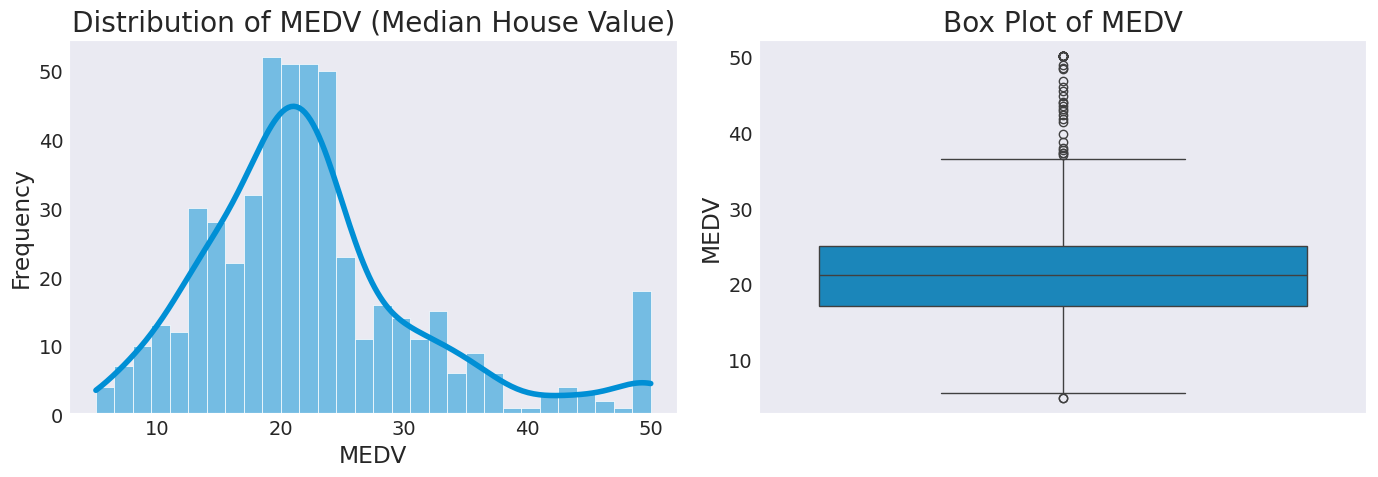


4. Feature Distributions


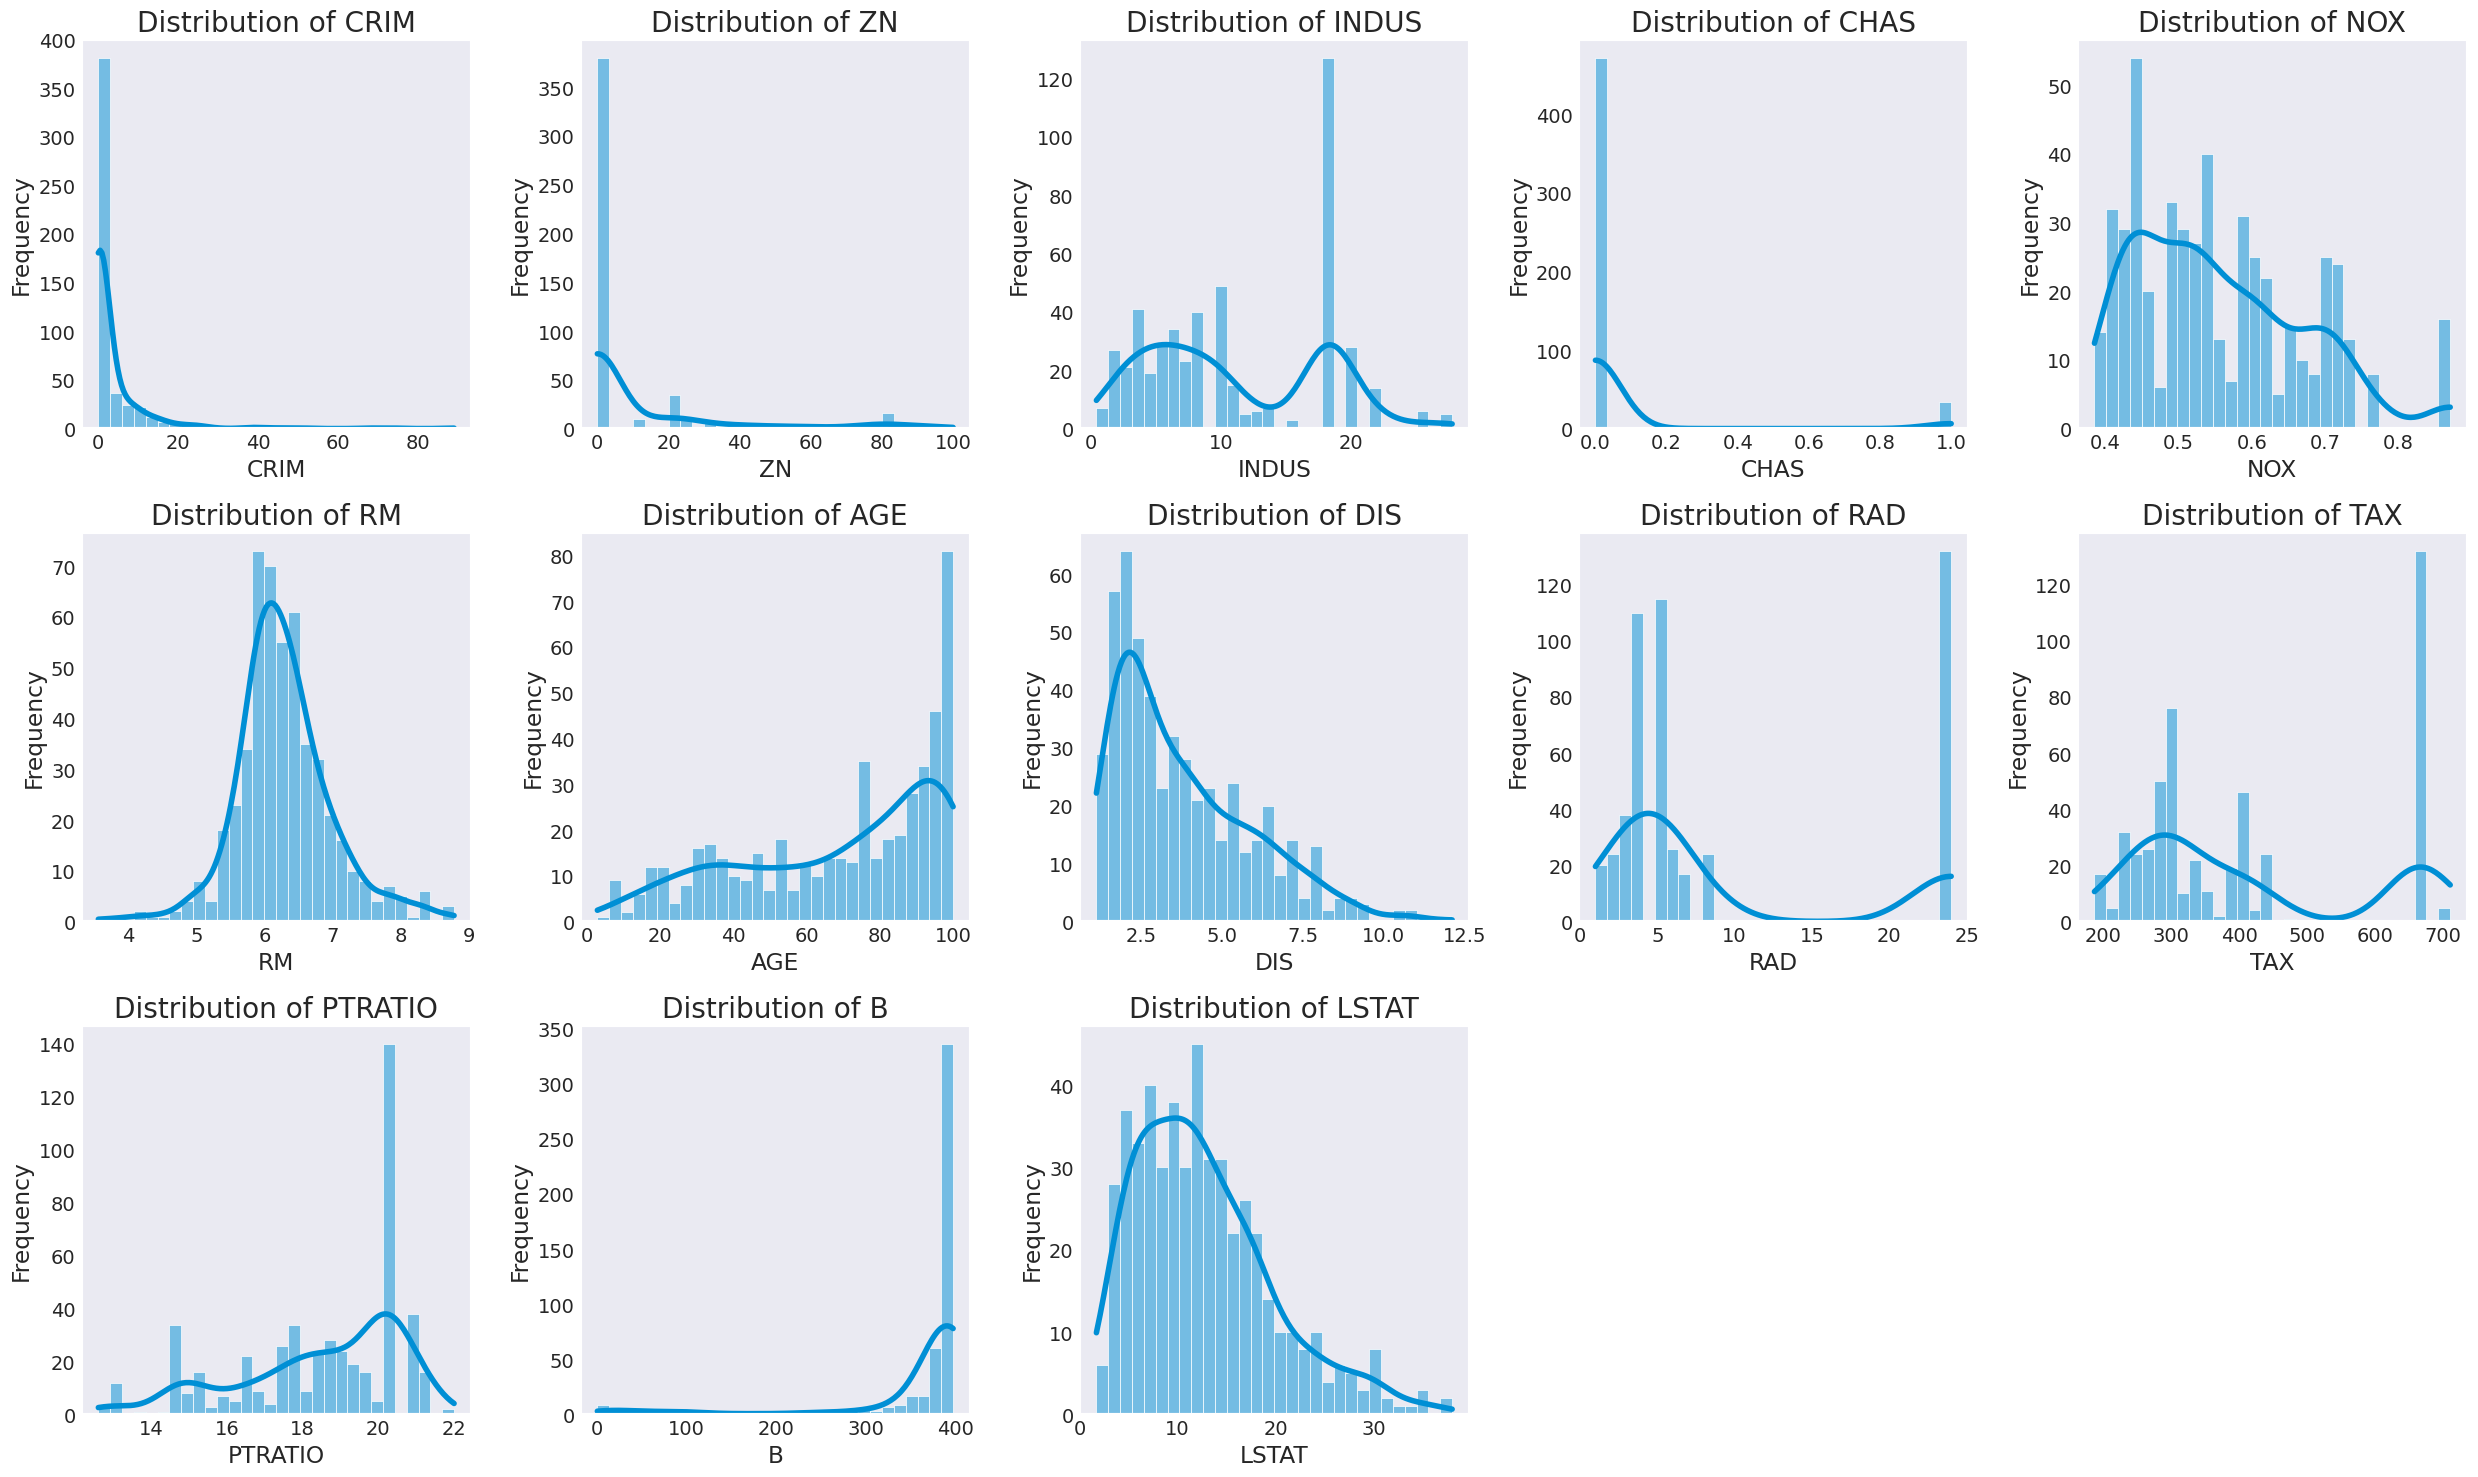


5. Correlation Analysis


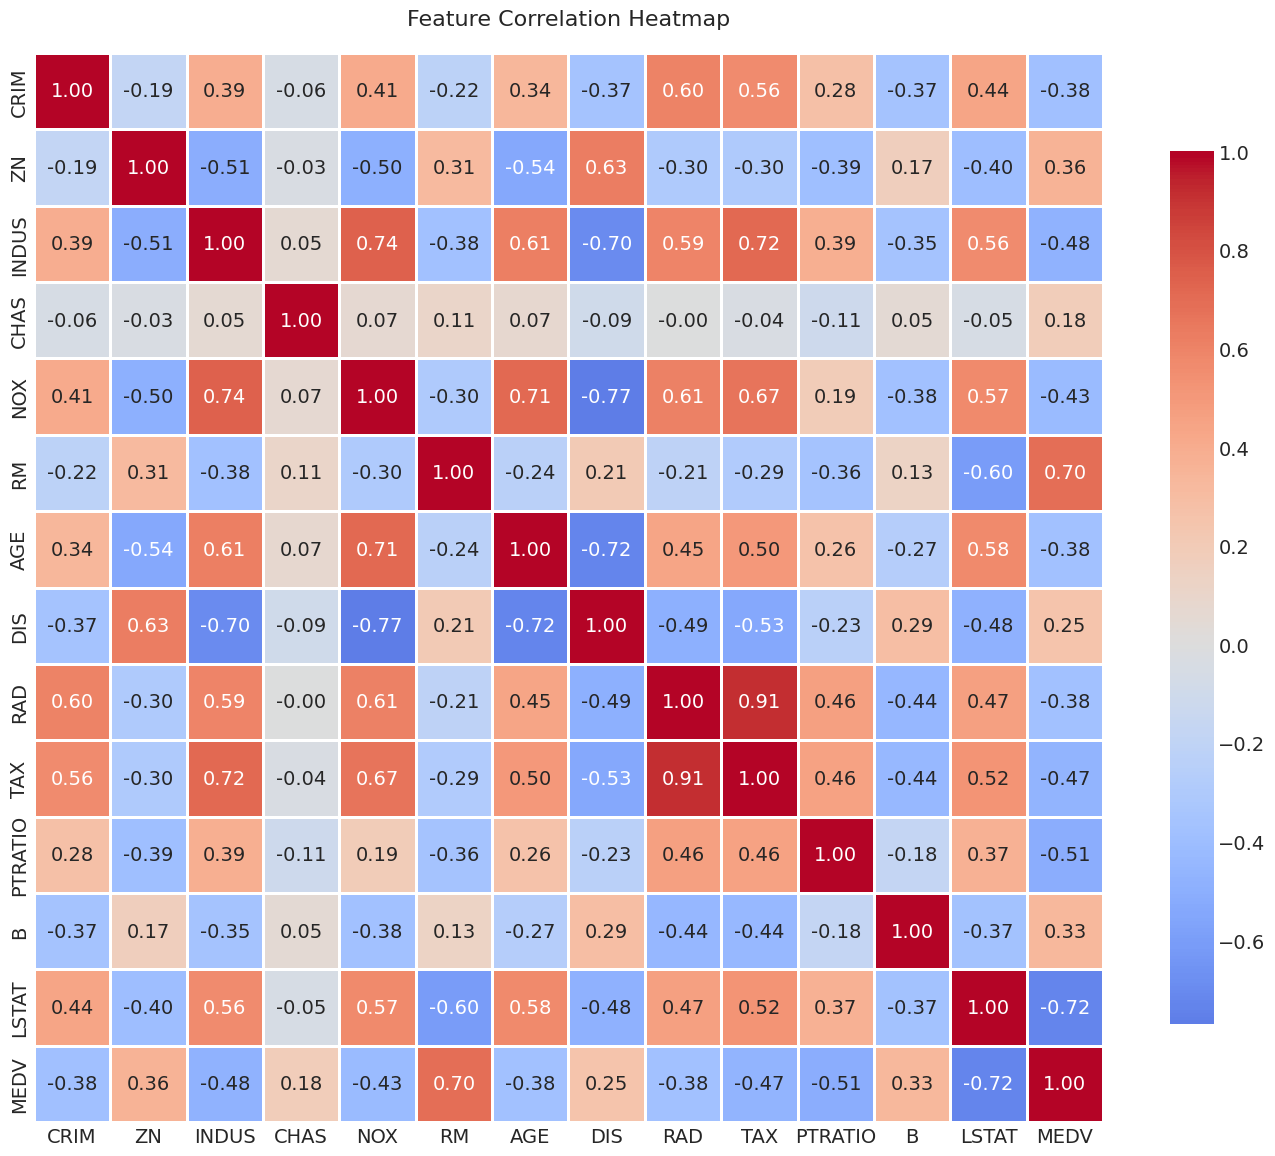


Top correlations with MEDV (target variable):
MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
LSTAT     -0.723093
Name: MEDV, dtype: float64


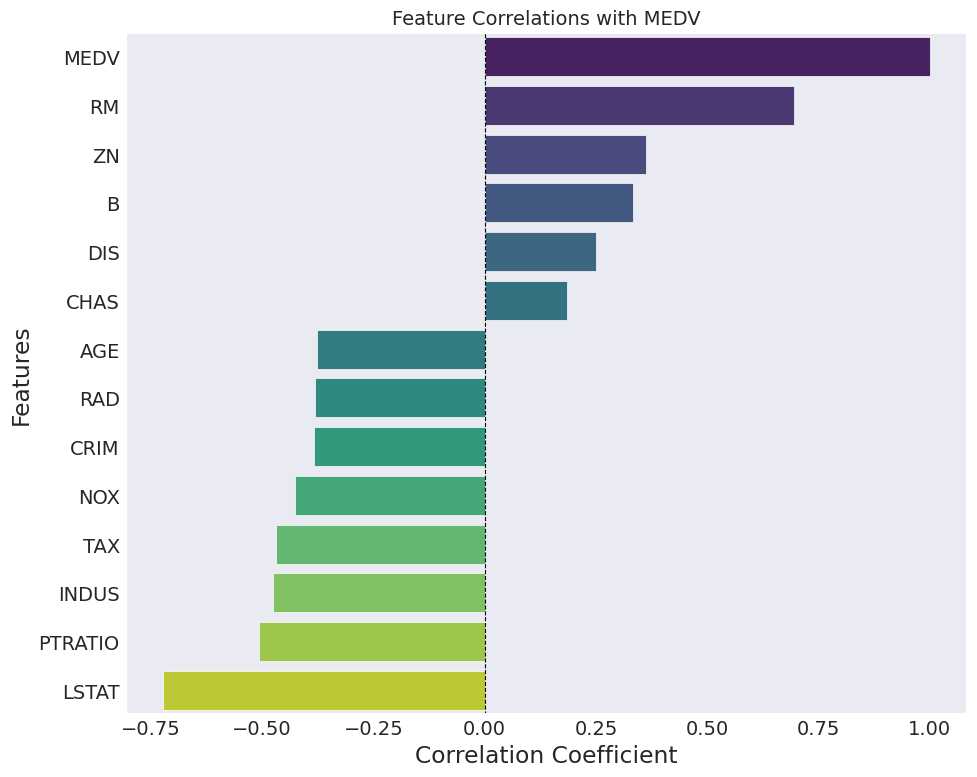


6. Feature-Target Relationships


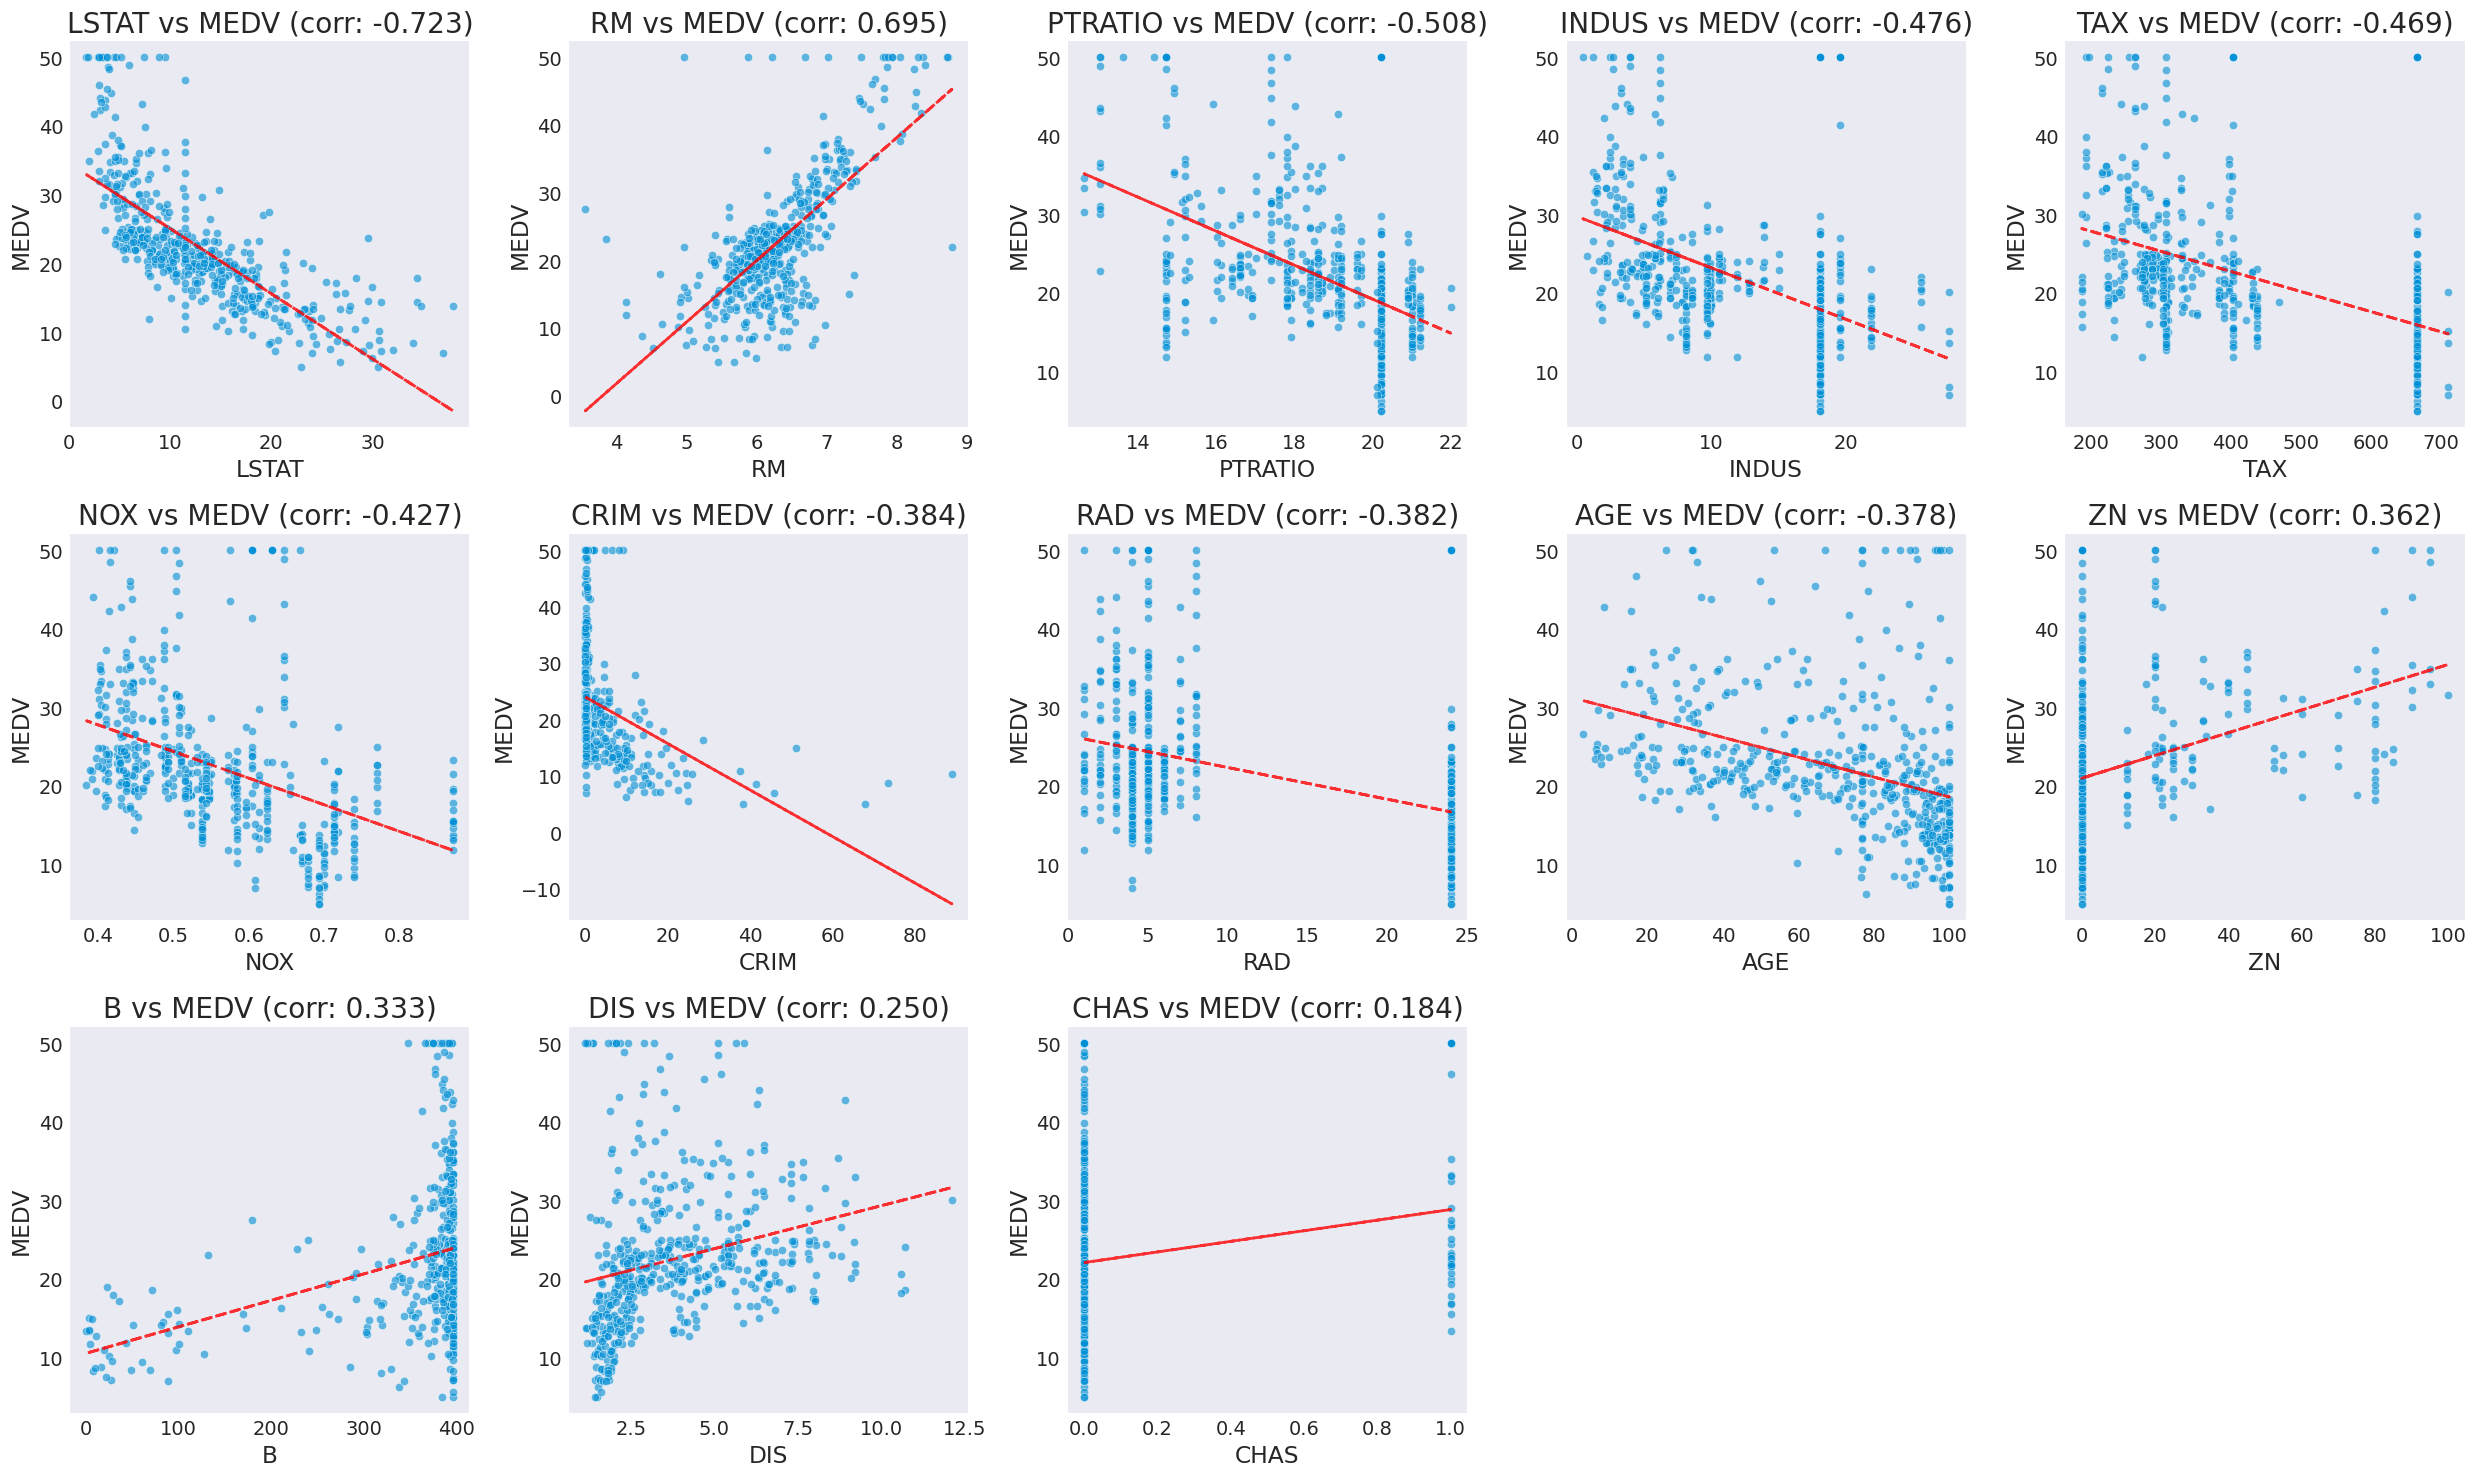


7. Categorical Feature Analysis (CHAS)
CHAS value counts:
CHAS
0.0    472
1.0     34
Name: count, dtype: int64


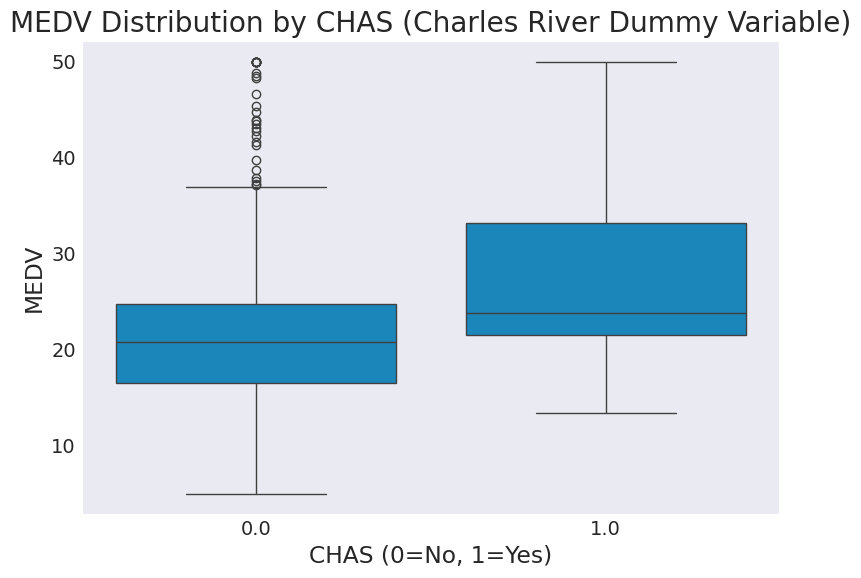


8. Outlier Detection


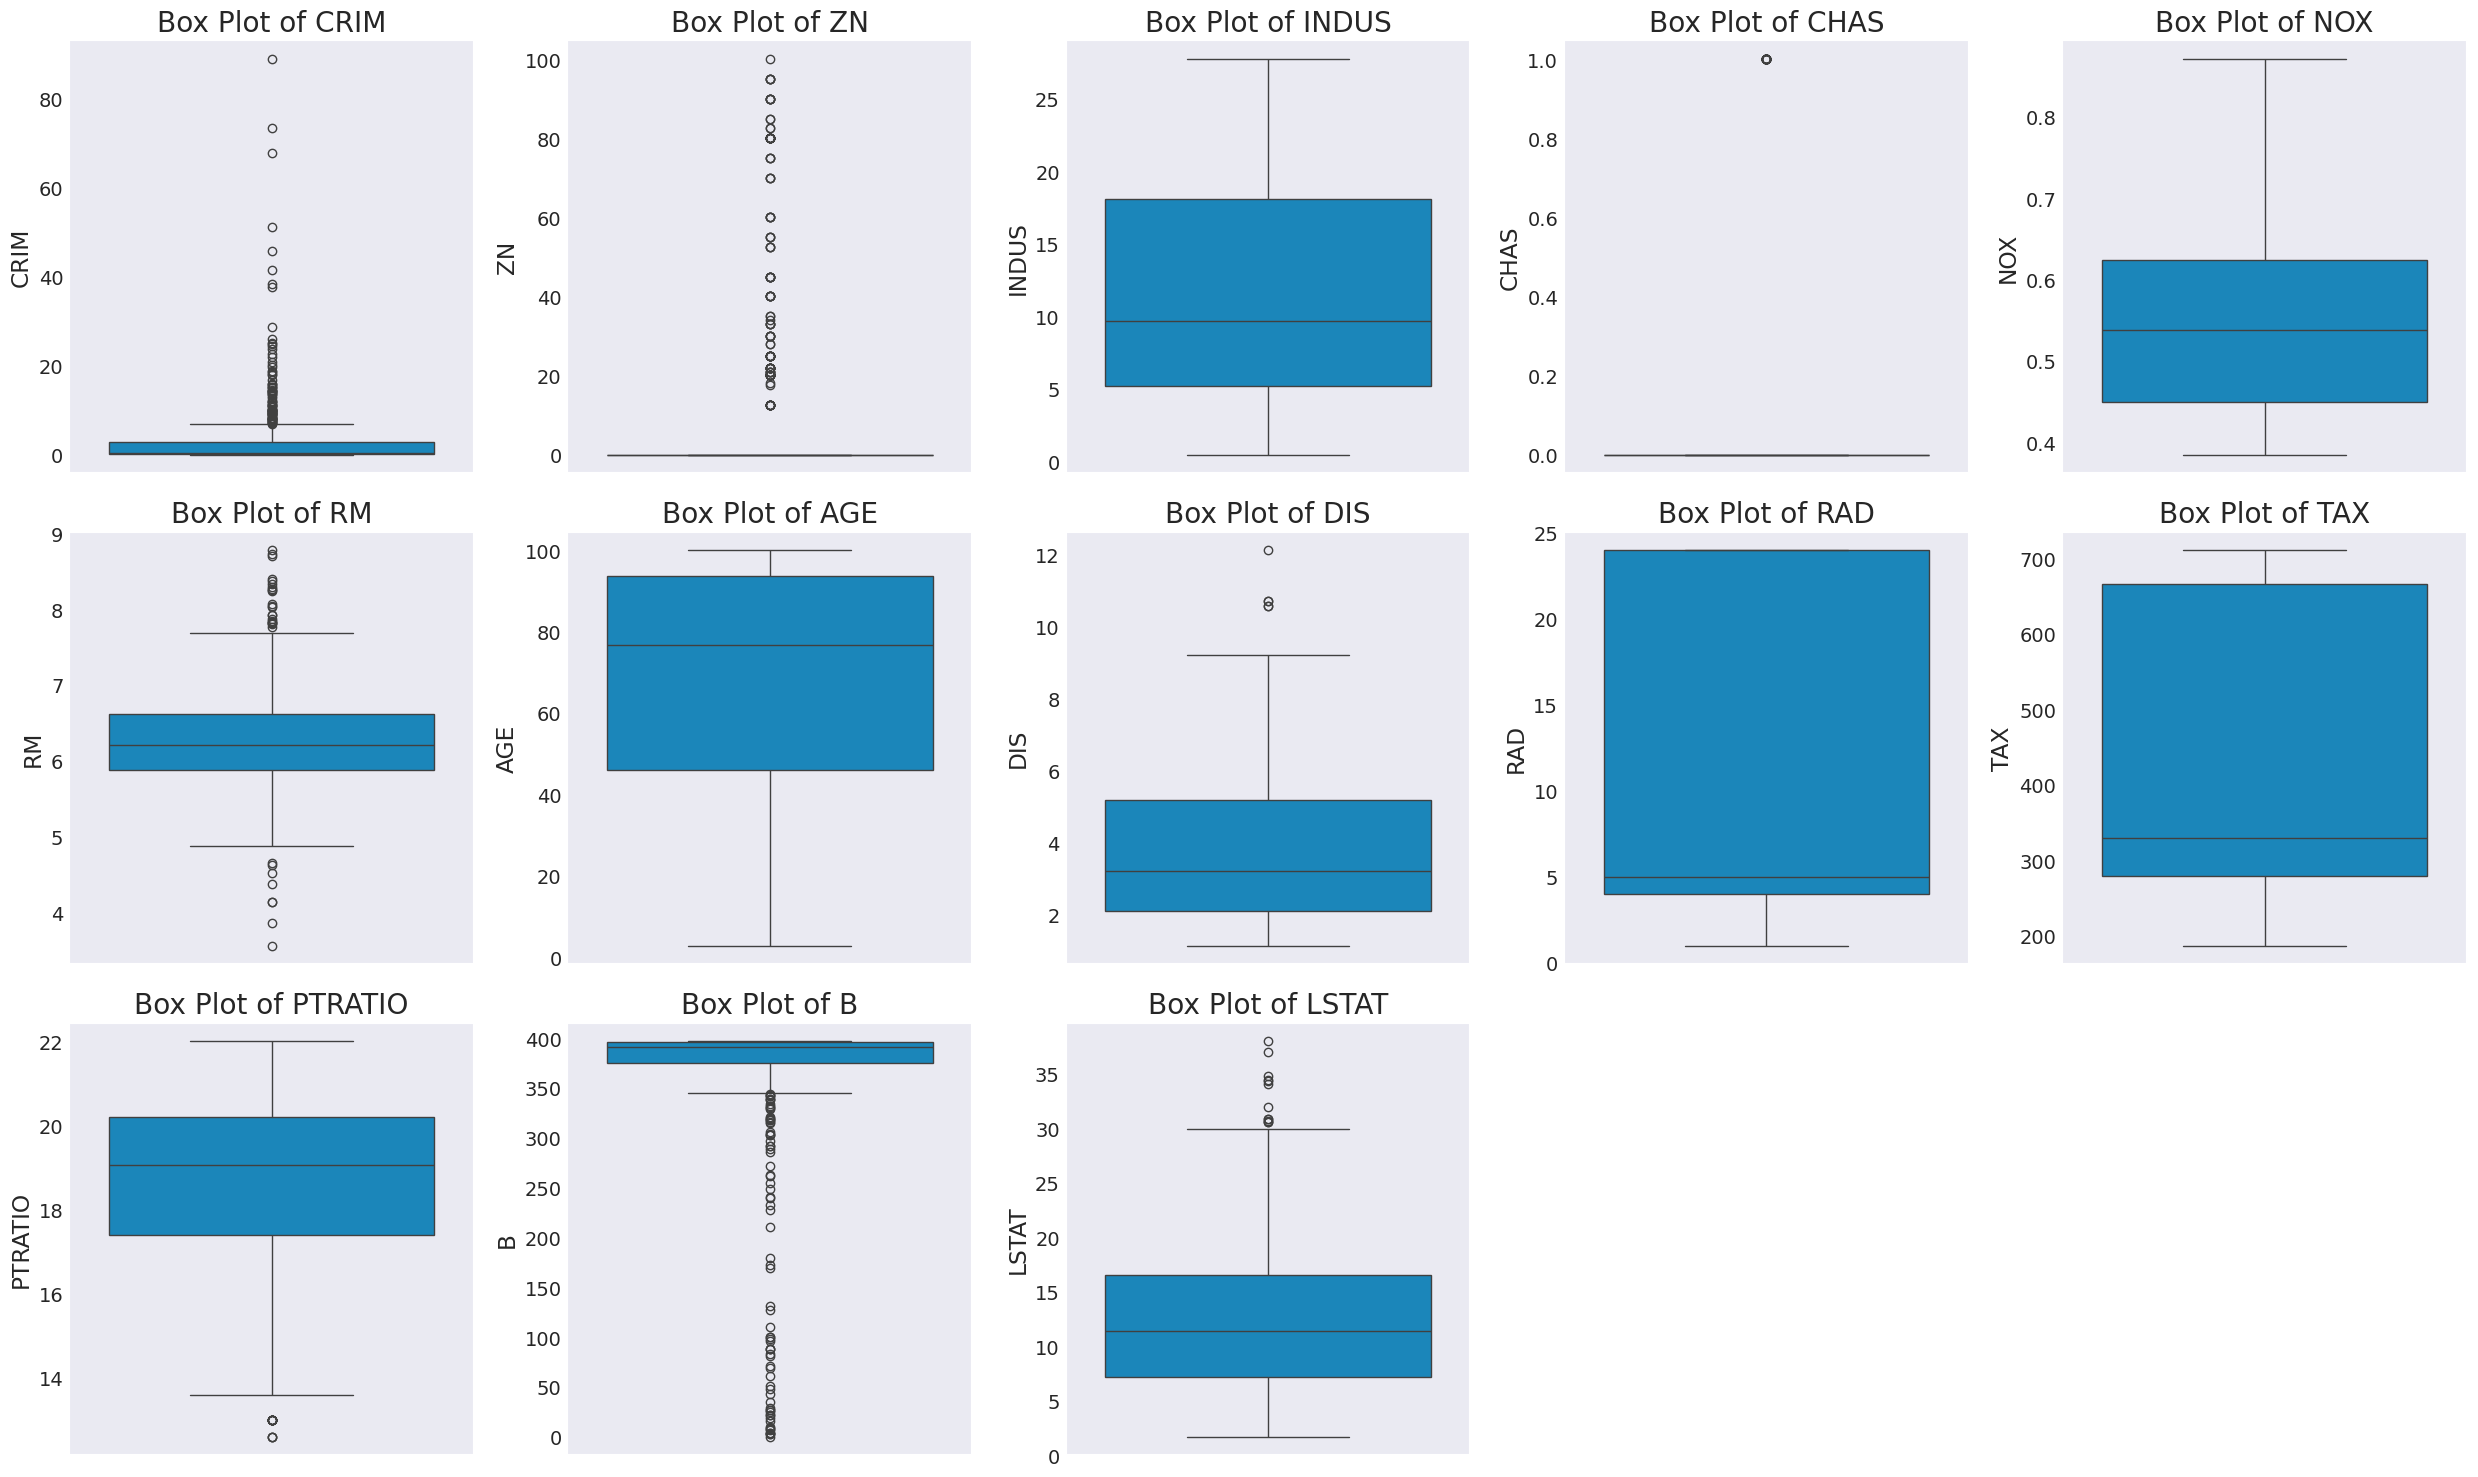


EDA Complete!


In [12]:
# Exploratory Data Analysis (EDA) and Visualization
print("=" * 60)
print("Exploratory Data Analysis (EDA)")
print("=" * 60)

# Use the filled dataset for analysis
df_eda = df_filled.copy()

# 1. Basic Statistical Summary
print("\n1. Basic Statistical Summary")
print("=" * 60)
print(df_eda.describe())

# 2. Data Shape and Info
print("\n2. Dataset Information")
print("=" * 60)
print(f"Dataset shape: {df_eda.shape}")
print(f"Number of features: {df_eda.shape[1] - 1}")  # Excluding target variable
print(f"Number of samples: {df_eda.shape[0]}")

# 3. Target Variable Distribution
print("\n3. Target Variable (MEDV) Analysis")
print("=" * 60)
print(f"Mean MEDV: {df_eda['MEDV'].mean():.2f}")
print(f"Median MEDV: {df_eda['MEDV'].median():.2f}")
print(f"Std MEDV: {df_eda['MEDV'].std():.2f}")
print(f"Min MEDV: {df_eda['MEDV'].min():.2f}")
print(f"Max MEDV: {df_eda['MEDV'].max():.2f}")

# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
sns.histplot(df_eda['MEDV'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of MEDV (Median House Value)')
axes[0].set_xlabel('MEDV')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(y=df_eda['MEDV'], ax=axes[1])
axes[1].set_title('Box Plot of MEDV')
axes[1].set_ylabel('MEDV')

plt.tight_layout()
plt.show()

# 4. Feature Distributions
print("\n4. Feature Distributions")
print("=" * 60)

# Select numeric features (exclude target variable for now)
numeric_features = [col for col in df_eda.columns if col != 'MEDV']

# Create distribution plots for all numeric features
n_features = len(numeric_features)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(df_eda[feature], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide extra subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 5. Correlation Analysis
print("\n5. Correlation Analysis")
print("=" * 60)

# Calculate correlation matrix
correlation_matrix = df_eda.corr()

# Visualize correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Show top correlations with target variable
print("\nTop correlations with MEDV (target variable):")
medv_corr = correlation_matrix['MEDV'].sort_values(ascending=False)
print(medv_corr)

# Visualize correlations with target variable
plt.figure(figsize=(10, 8))
sns.barplot(x=medv_corr.values, y=medv_corr.index, palette='viridis')
plt.title('Feature Correlations with MEDV', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# 6. Relationship between Features and Target Variable
print("\n6. Feature-Target Relationships")
print("=" * 60)

# Select top correlated features (excluding MEDV itself)
top_features = medv_corr[medv_corr.index != 'MEDV'].abs().sort_values(ascending=False).head(13).index

# Create scatter plots for top correlated features
n_top = len(top_features)
n_cols = 5
n_rows = (n_top + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    sns.scatterplot(data=df_eda, x=feature, y='MEDV', ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{feature} vs MEDV (corr: {correlation_matrix.loc[feature, "MEDV"]:.3f})')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MEDV')
    
    # Add trend line
    z = np.polyfit(df_eda[feature], df_eda['MEDV'], 1)
    p = np.poly1d(z)
    axes[i].plot(df_eda[feature], p(df_eda[feature]), "r--", alpha=0.8, linewidth=2)

# Hide extra subplots
for i in range(n_top, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 7. Categorical Feature Analysis (CHAS)
print("\n7. Categorical Feature Analysis (CHAS)")
print("=" * 60)

if 'CHAS' in df_eda.columns:
    print("CHAS value counts:")
    print(df_eda['CHAS'].value_counts())
    
    # Box plot: CHAS vs MEDV
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_eda, x='CHAS', y='MEDV')
    plt.title('MEDV Distribution by CHAS (Charles River Dummy Variable)')
    plt.xlabel('CHAS (0=No, 1=Yes)')
    plt.ylabel('MEDV')
    plt.tight_layout()
    plt.show()

# 8. Outlier Detection using Box Plots
print("\n8. Outlier Detection")
print("=" * 60)

# Create box plots for all numeric features
# Recalculate subplot dimensions for outlier detection
n_features_outlier = len(numeric_features)
n_cols_outlier = 5
n_rows_outlier = (n_features_outlier + n_cols_outlier - 1) // n_cols_outlier

fig, axes = plt.subplots(n_rows_outlier, n_cols_outlier, figsize=(5 * n_cols_outlier, 5 * n_rows_outlier))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df_eda[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)

# Hide extra subplots
for i in range(n_features_outlier, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print("\nEDA Complete!")
